# **Machine learning-based prediction of COVID-19 diagnosis based on symptoms**

**A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020. Please consider 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set. Please further divide training and validation set at a ratio of 4:1.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('corona_tested_006.csv')

<ipython-input-7-15386b71974a>:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('corona_tested_006.csv')


In [ ]:
data.head()

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           TRUE  FALSE        TRUE               FALSE   
1       2  11-03-2020          FALSE   TRUE       FALSE               FALSE   
2       3  11-03-2020          FALSE   TRUE       FALSE               FALSE   
3       4  11-03-2020           TRUE  FALSE       FALSE               FALSE   
4       5  11-03-2020           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex           Known_contact  
0    FALSE  negative         None  None                  Abroad  
1    FALSE  positive         None  None                  Abroad  
2    FALSE  positive         None  None                  Abroad  
3    FALSE  negative         None  None                  Abroad  
4    FALSE  negative         None  None  Contact with confirmed

In [ ]:
data.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [ ]:
data.isna()

Ind_ID  Test_date  Cough_symptoms  Fever  Sore_throat  \
0        False      False           False  False        False   
1        False      False           False  False        False   
2        False      False           False  False        False   
3        False      False           False  False        False   
4        False      False           False  False        False   
...        ...        ...             ...    ...          ...   
278843   False      False           False  False        False   
278844   False      False           False  False        False   
278845   False      False           False  False        False   
278846   False      False           False  False        False   
278847   False      False           False  False        False   

        Shortness_of_breath  Headache  Corona  Age_60_above    Sex  \
0                     False     False   False         False  False   
1                     False     False   False         False  False   
2                     False     False   False         False  False   
3                     False     False   False         False  False   
4                     False     False   False         False  False   
...                     ...       ...     ...           ...    ...   
278843                False     False   False         False  False   
278844                False     False   False         False  False   
278845                False     False   False         False  False   
278846                False     False   False         False  False   
278847                False     False   False         False  False   

        Known_contact  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
278843          False  
278844          False  
278845          False  
278846          False  
278847          False  

[278848 rows x 11 columns]

# **Hypothesis**

Since We have categorical variables, lets use chi-square test

Null Hypothesis H0 = The 2 variables to be compared are independent

Alternate Hypothesis H1 = The 2 variables are dependent

If p-value > 0.05, then accept the null hypothesis and reject alternate hypothesis

if p-value < 0.05, then reject the null hypothesis and accept the alternate hypothesis

In [ ]:
from scipy.stats import chi2_contingency

observed_table = pd.crosstab(data['Fever'], data['Corona'])
print(observed_table) ## contingency table showing correlation between fever and corona

Corona  negative  other  positive
Fever                            
False     132399   2045      3330
True        8806    216       980
FALSE     111793   1470      5807
None         219      0        33
TRUE        7010    161      4579


In [ ]:
observed_table = pd.crosstab([data.Fever, data.Cough_symptoms, data.Sore_throat], data.Corona)
print(observed_table)

Corona                            negative  other  positive
Fever Cough_symptoms Sore_throat                           
False False          False          120360   1787      2446
                     True                7      2        11
      True           False           12018    256       858
                     True               14      0        15
True  False          False            2576     57       274
                     True                3      0         8
      True           False            6216    159       685
                     True               11      0        13
FALSE FALSE          False           48846    469      1768
                     True               11      0       139
                     FALSE           51566    871      1569
                     TRUE               64      3       173
      None           TRUE                0      0         1
      TRUE           False            7095     50       856
                     True               

**Null Hypothesis(H0) = Feature is a symptom of Corona**

**Alternate hypothesis(H1) = Feature is not a symptom of Corona**

In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab(data['Cough_symptoms'], data['Corona'])
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 16385.14505395038
P-Value: 0.0
Degree of Freedom: 8
Expected Frequencies: [[1.19014695e+05 1.78000435e+03 6.73630114e+03]
 [1.88930730e+04 2.82568066e+02 1.06935895e+03]
 [1.01569048e+05 1.51908425e+03 5.74886739e+03]
 [2.35171864e+02 3.51727106e+00 1.33108647e+01]
 [2.05150123e+04 3.06826070e+02 1.16116166e+03]]


Since p-value < 0.05, we have to reject null hpothesis and accept alternate hypothesis i.e.; Cough is not a symptom of Covid-19

In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab(data['Fever'], data['Corona'])
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 29489.927467890422
P-Value: 0.0
Degree of Freedom: 8
Expected Frequencies: [[1.28573684e+05 1.92297025e+03 7.27734553e+03]
 [9.33408328e+03 1.39602163e+02 5.28314558e+02]
 [1.11118706e+05 1.66191057e+03 6.28938357e+03]
 [2.35171864e+02 3.51727106e+00 1.33108647e+01]
 [1.09653548e+04 1.63999742e+02 6.20645477e+02]]


Since p-value < 0.05, we have to reject null hypothesis and accept alternate hypothesis i.e.; Fever is not a symptom of Covid-19

In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab(data['Sore_throat'], data['Corona'])
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 22709.940162053714
P-Value: 0.0
Degree of Freedom: 8
Expected Frequencies: [[1.98387998e+05 2.96712520e+03 1.12288764e+04]
 [6.79385386e+02 1.01610053e+01 3.84536091e+01]
 [6.00406835e+04 8.97978842e+02 3.39833771e+03]
 [9.33221683e-01 1.39574248e-02 5.28208917e-02]
 [1.11799958e+03 1.67209950e+01 6.32794282e+01]]


Since p-value < 0.05, we have to reject null hpothesis and accept alternate hypothesis i.e.; Sore throat is not a symptom of Covid-19

In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab(data['Shortness_of_breath'], data['Corona'])
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 16559.181971535443
P-Value: 0.0
Degree of Freedom: 8
Expected Frequencies: [[1.98628770e+05 2.97072622e+03 1.12425042e+04]
 [4.38614191e+02 6.55998967e+00 2.48258191e+01]
 [6.01256066e+04 8.99248967e+02 3.40314441e+03]
 [9.33221683e-01 1.39574248e-02 5.28208917e-02]
 [1.03307640e+03 1.54508693e+01 5.84727271e+01]]


Since p-value < 0.05, we have to reject null hpothesis and accept alternate hypothesis i.e.; Shortness of breath is not a symptom of Covid-19

In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab(data['Headache'], data['Corona'])
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 38054.45881898464
P-Value: 0.0
Degree of Freedom: 8
Expected Frequencies: [[1.98147227e+05 2.96352419e+03 1.12152486e+04]
 [9.20156580e+02 1.37620209e+01 5.20813992e+01]
 [5.98260425e+04 8.94768634e+02 3.38618890e+03]
 [9.33221683e-01 1.39574248e-02 5.28208917e-02]
 [1.33264056e+03 1.99312027e+01 7.54282333e+01]]


Since p-value < 0.05, we have to reject null hpothesis and accept alternate hypothesis i.e.; Headache is not a symptom of Covid-19

In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab(data['Age_60_above'], data['Corona'])
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 3559.7215545706613
P-Value: 0.0
Degree of Freedom: 4
Expected Frequencies: [[117308.76528073   1754.49017386   6639.74454542]
 [118817.78474294   1777.05932981   6725.15592724]
 [ 24100.44997633    360.45049633   1364.09952734]]


Since p-value < 0.05, we have to reject null hpothesis and accept alternate hypothesis i.e.; Age above 60 is not a symptom of Covid-19

In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab(data['Sex'], data['Corona'])
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 453.60951481507027
P-Value: 7.202913146151896e-97
Degree of Freedom: 4
Expected Frequencies: [[ 18256.61579427    273.04910202   1033.33510371]
 [121466.26788071   1816.67050149   6875.0616178 ]
 [120504.11632502   1802.28039649   6820.60327849]]


Since p-value > 0.05, we have to reject alternate hypothesis and accept null hypothesis i.e.; Sex is a symptom of Covid-19 (doubtful). SInce it is doubtful we have to do some other method of comparison

In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab(data['Known_contact'], data['Corona'])
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 90430.73068897007
P-Value: 0.0
Degree of Freedom: 4
Expected Frequencies: [[2.37672898e+04 3.55467696e+02 1.34524247e+03]
 [9.92854549e+03 1.48493043e+02 5.61961466e+02]
 [2.26531165e+05 3.38803926e+03 1.28217961e+04]]


Since p-value < 0.05, we have to reject null hypothesis and accept alternate hypothesis i.e.; known contact is not a symptom of Covid-19

# **Combination of features**

In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab([data.Cough_symptoms, data.Fever, data.Sore_throat, data.Shortness_of_breath, data.Headache, data.Age_60_above, data.Sex, data.Known_contact], data.Corona)
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 150357.26595019622
P-Value: 0.0
Degree of Freedom: 2126
Expected Frequencies: [[1.49315469e+01 2.23318797e-01 8.45134267e-01]
 [2.79966505e+00 4.18722745e-02 1.58462675e-01]
 [7.05515593e+02 1.05518132e+01 3.99325941e+01]
 ...
 [9.33221683e-01 1.39574248e-02 5.28208917e-02]
 [9.33221683e-01 1.39574248e-02 5.28208917e-02]
 [2.79966505e+00 4.18722745e-02 1.58462675e-01]]


In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab([data.Cough_symptoms, data.Fever], data.Corona)
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 35243.17399808953
P-Value: 0.0
Degree of Freedom: 22
Expected Frequencies: [[1.16291554e+05 1.73927658e+03 6.58216977e+03]
 [2.72314087e+03 4.07277657e+01 1.54131362e+02]
 [1.22821306e+04 1.83693668e+02 6.95175755e+02]
 [6.61094241e+03 9.88743975e+01 3.74183197e+02]
 [9.84352900e+04 1.47221521e+03 5.57149483e+03]
 [3.13375841e+03 4.68690326e+01 1.77372554e+02]
 [9.33221683e-01 1.39574248e-02 5.28208917e-02]
 [2.33305421e+02 3.48935621e+00 1.32052229e+01]
 [9.33221683e-01 1.39574248e-02 5.28208917e-02]
 [1.26824827e+04 1.89681403e+02 7.17835918e+02]
 [1.86644337e+00 2.79148497e-02 1.05641783e-01]
 [7.83066315e+03 1.17116752e+02 4.43220102e+02]]


In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab([data.Fever, data.Sore_throat], data.Corona)
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 45909.76806034996
P-Value: 0.0
Degree of Freedom: 30
Expected Frequencies: [[1.28527956e+05 1.92228634e+03 7.27475731e+03]
 [4.57278625e+01 6.83913817e-01 2.58822369e+00]
 [9.30142052e+03 1.39113653e+02 5.26465827e+02]
 [3.26627589e+01 4.88509869e-01 1.84873121e+00]
 [5.51384699e+04 8.24660489e+02 3.12086956e+03]
 [3.15428929e+02 4.71760959e+00 1.78534614e+01]
 [5.50815434e+04 8.23809086e+02 3.11764749e+03]
 [5.83263552e+02 8.72339052e+00 3.30130573e+01]
 [2.10908100e+02 3.15437801e+00 1.19375215e+01]
 [2.05308770e+01 3.07063346e-01 1.16205962e+00]
 [9.33221683e-01 1.39574248e-02 5.28208917e-02]
 [2.79966505e+00 4.18722745e-02 1.58462675e-01]
 [5.20924344e+03 7.79103454e+01 2.94846217e+02]
 [2.85565835e+02 4.27097200e+00 1.61631929e+01]
 [4.93860915e+03 7.38626922e+01 2.79528159e+02]
 [5.31936360e+02 7.95573216e+00 3.01079083e+01]]


In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab([data.Sore_throat, data.Shortness_of_breath], data.Corona)
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 33818.4657316176
P-Value: 0.0
Degree of Freedom: 16
Expected Frequencies: [[1.98064170e+05 2.96228197e+03 1.12105476e+04]
 [3.23827924e+02 4.84322642e+00 1.83288494e+01]
 [5.64599119e+02 8.44424202e+00 3.19566395e+01]
 [1.14786267e+02 1.71676325e+00 6.49696968e+00]
 [5.92222480e+04 8.85738180e+02 3.35201379e+03]
 [8.18435416e+02 1.22406616e+01 4.63239220e+01]
 [9.33221683e-01 1.39574248e-02 5.28208917e-02]
 [9.03358590e+02 1.35107872e+01 5.11306231e+01]
 [2.14640987e+02 3.21020771e+00 1.21488051e+01]]


In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab([data.Shortness_of_breath, data.Headache], data.Corona)
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 47599.14908513526
P-Value: 0.0
Degree of Freedom: 16
Expected Frequencies: [[1.97857928e+05 2.95919738e+03 1.11988742e+04]
 [7.70841111e+02 1.15288329e+01 4.36300565e+01]
 [2.89298722e+02 4.32680170e+00 1.63744764e+01]
 [1.49315469e+02 2.23318797e+00 8.45134267e+00]
 [5.90225386e+04 8.82751291e+02 3.34071011e+03]
 [1.10306803e+03 1.64976762e+01 6.24342940e+01]
 [9.33221683e-01 1.39574248e-02 5.28208917e-02]
 [8.03503869e+02 1.20173428e+01 4.54787877e+01]
 [2.29572534e+02 3.43352651e+00 1.29939394e+01]]


In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab([data.Headache, data.Age_60_above], data.Corona)
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 40046.64345345496
P-Value: 0.0
Degree of Freedom: 24
Expected Frequencies: [[6.77929560e+04 1.01392317e+03 3.83712085e+03]
 [1.14580025e+05 1.71367866e+03 6.48529626e+03]
 [1.57742461e+04 2.35922352e+02 8.92831532e+02]
 [7.89505544e+02 1.18079814e+01 4.46864744e+01]
 [2.70634288e+01 4.04765320e-01 1.53180586e+00]
 [1.03587607e+02 1.54927416e+00 5.86311898e+00]
 [4.76325679e+04 7.12400921e+02 2.69603113e+03]
 [4.13603850e+03 6.18593069e+01 2.34102192e+02]
 [8.05743602e+03 1.20508406e+02 4.56055579e+02]
 [9.33221683e-01 1.39574248e-02 5.28208917e-02]
 [1.09373581e+03 1.63581019e+01 6.19060850e+01]
 [7.37245130e+01 1.10263656e+00 4.17285044e+00]
 [1.65180238e+02 2.47046420e+00 9.34929783e+00]]


In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab([data.Age_60_above, data.Sex], data.Corona)
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 4270.075446906647
P-Value: 0.0
Degree of Freedom: 16
Expected Frequencies: [[1.06536587e+04 1.59337962e+02 6.03003299e+02]
 [5.16631524e+04 7.72683039e+02 2.92416456e+03]
 [5.49919541e+04 8.22469173e+02 3.11257668e+03]
 [6.01927986e+03 9.00253902e+01 3.40694751e+02]
 [5.78214823e+04 8.64788085e+02 3.27272963e+03]
 [5.49770226e+04 8.22245854e+02 3.11173155e+03]
 [1.58367720e+03 2.36857499e+01 8.96370532e+01]
 [1.19816332e+04 1.79199377e+02 6.78167428e+02]
 [1.05351396e+04 1.57565369e+02 5.96295046e+02]]


In [ ]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab([data.Sex, data.Known_contact], data.Corona)
chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")
print(f"Degree of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square value: 92518.45449132986
P-Value: 0.0
Degree of Freedom: 16
Expected Frequencies: [[1.67979903e+03 2.51233647e+01 9.50776050e+01]
 [8.32433742e+02 1.24500230e+01 4.71162354e+01]
 [1.57443830e+04 2.35475714e+02 8.91141263e+02]
 [1.00881264e+04 1.50879762e+02 5.70993839e+02]
 [4.40293990e+03 6.58511304e+01 2.49208967e+02]
 [1.06975202e+05 1.59993961e+03 6.05485881e+03]
 [1.19993644e+04 1.79464569e+02 6.79171025e+02]
 [4.69317185e+03 7.01918895e+01 2.65636264e+02]
 [1.03811580e+05 1.55262394e+03 5.87579599e+03]]


In [ ]:
features_combination = ['Cough_symptoms', 'Fever', 'Sore_throat']
target_variable = 'Corona'

observed_table = pd.crosstab(pd.Series(data[features_combination[0]]), data[target_variable])

# Loop through the remaining features and concatenate to the contingency table
for feature in features_combination[1:]:
    observed_table = pd.concat([observed_table, pd.crosstab(pd.Series(data[feature]), data[target_variable])], axis=1)

# Performing chi-square test
chi2, p, dof, expected = chi2_contingency(observed_table)

# Print results
print(f"\nChi-Square Test for {features_combination} vs {target_variable}:")
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")



Chi-Square Test for ['Cough_symptoms', 'Fever', 'Sore_throat'] vs Corona:
Chi-Square Value: 142640.1210824706
P-Value: 0.0
Degrees of Freedom: 32
Expected Frequencies:


In [ ]:
features_combination = ['Fever', 'Sore_throat', 'Shortness_of_breath']
target_variable = 'Corona'

observed_table = pd.crosstab(pd.Series(data[features_combination[0]]), data[target_variable])

# Loop through the remaining features and concatenate to the contingency table
for feature in features_combination[1:]:
    observed_table = pd.concat([observed_table, pd.crosstab(pd.Series(data[feature]), data[target_variable])], axis=1)

# Performing chi-square test
chi2, p, dof, expected = chi2_contingency(observed_table)

# Print results
print(f"\nChi-Square Test for {features_combination} vs {target_variable}:")
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")


Chi-Square Test for ['Fever', 'Sore_throat', 'Shortness_of_breath'] vs Corona:
Chi-Square Value: 156662.31651524315
P-Value: 0.0
Degrees of Freedom: 32
Expected Frequencies:


In [ ]:
features_combination = ['Sore_throat', 'Shortness_of_breath', 'Headache']
target_variable = 'Corona'

observed_table = pd.crosstab(pd.Series(data[features_combination[0]]), data[target_variable])

# Loop through the remaining features and concatenate to the contingency table
for feature in features_combination[1:]:
    observed_table = pd.concat([observed_table, pd.crosstab(pd.Series(data[feature]), data[target_variable])], axis=1)

# Performing chi-square test
chi2, p, dof, expected = chi2_contingency(observed_table)

# Print results
print(f"\nChi-Square Test for {features_combination} vs {target_variable}:")
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")


Chi-Square Test for ['Sore_throat', 'Shortness_of_breath', 'Headache'] vs Corona:
Chi-Square Value: 82488.94098792569
P-Value: 0.0
Degrees of Freedom: 32
Expected Frequencies:


In [ ]:
features_combination = ['Shortness_of_breath', 'Headache', 'Sex']
target_variable = 'Corona'

observed_table = pd.crosstab(pd.Series(data[features_combination[0]]), data[target_variable])

# Loop through the remaining features and concatenate to the contingency table
for feature in features_combination[1:]:
    observed_table = pd.concat([observed_table, pd.crosstab(pd.Series(data[feature]), data[target_variable])], axis=1)

# Performing chi-square test
chi2, p, dof, expected = chi2_contingency(observed_table)

# Print results
print(f"\nChi-Square Test for {features_combination} vs {target_variable}:")
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")


Chi-Square Test for ['Shortness_of_breath', 'Headache', 'Sex'] vs Corona:
Chi-Square Value: nan
P-Value: nan
Degrees of Freedom: 48
Expected Frequencies:


In [ ]:
features_combination = ['Headache', 'Sex', 'Known_contact']
target_variable = 'Corona'

observed_table = pd.crosstab(pd.Series(data[features_combination[0]]), data[target_variable])

# Loop through the remaining features and concatenate to the contingency table
for feature in features_combination[1:]:
    observed_table = pd.concat([observed_table, pd.crosstab(pd.Series(data[feature]), data[target_variable])], axis=1)

# Performing chi-square test
chi2, p, dof, expected = chi2_contingency(observed_table)

# Print results
print(f"\nChi-Square Test for {features_combination} vs {target_variable}:")
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")


Chi-Square Test for ['Headache', 'Sex', 'Known_contact'] vs Corona:
Chi-Square Value: nan
P-Value: nan
Degrees of Freedom: 72
Expected Frequencies:


In [ ]:
from itertools import combinations
from scipy.stats import chi2_contingency

categorical_features = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']
target_variable = 'Corona'

# Loop over different subset sizes
for subset_size in range(1, len(categorical_features) + 1):
    # Generate all combinations of features for the current subset size
    for subset in combinations(categorical_features, subset_size):
        # Include the target variable in the subset
        subset_with_target = list(subset) + [target_variable]

        # Create a contingency table
        observed_table = pd.crosstab(data[subset_with_target[:-1]].squeeze(), data[subset_with_target[-1]].squeeze())

        # Perform chi-square test
        chi2, p, dof, expected = chi2_contingency(observed_table)

        # Print results
        print(f"\nChi-Square Test for {subset} vs {target_variable}:")
        print(f"Chi-Square Value: {chi2}")
        print(f"P-Value: {p}")
        print(f"Degrees of Freedom: {dof}")
        print("Expected Frequencies:")
        print(expected)


Chi-Square Test for ('Cough_symptoms',) vs Corona:
Chi-Square Value: 16385.14505395038
P-Value: 0.0
Degrees of Freedom: 8
Expected Frequencies:
[[1.19014695e+05 1.78000435e+03 6.73630114e+03]
 [1.88930730e+04 2.82568066e+02 1.06935895e+03]
 [1.01569048e+05 1.51908425e+03 5.74886739e+03]
 [2.35171864e+02 3.51727106e+00 1.33108647e+01]
 [2.05150123e+04 3.06826070e+02 1.16116166e+03]]

Chi-Square Test for ('Fever',) vs Corona:
Chi-Square Value: 29489.927467890422
P-Value: 0.0
Degrees of Freedom: 8
Expected Frequencies:
[[1.28573684e+05 1.92297025e+03 7.27734553e+03]
 [9.33408328e+03 1.39602163e+02 5.28314558e+02]
 [1.11118706e+05 1.66191057e+03 6.28938357e+03]
 [2.35171864e+02 3.51727106e+00 1.33108647e+01]
 [1.09653548e+04 1.63999742e+02 6.20645477e+02]]

Chi-Square Test for ('Sore_throat',) vs Corona:
Chi-Square Value: 22709.940162053714
P-Value: 0.0
Degrees of Freedom: 8
Expected Frequencies:
[[1.98387998e+05 2.96712520e+03 1.12288764e+04]
 [6.79385386e+02 1.01610053e+01 3.84536091e+0

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

# **Countplots for more clarification**

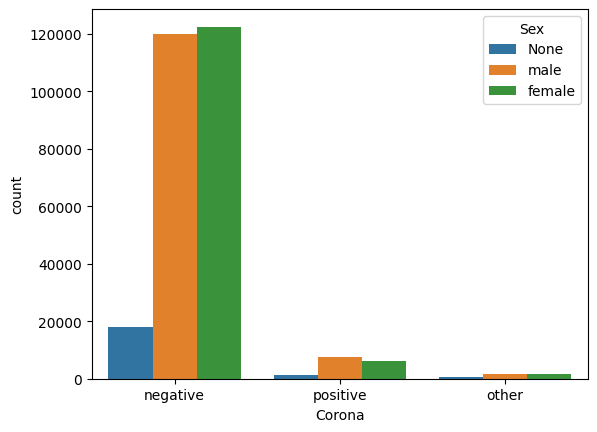

In [ ]:
## FINDING RELATIONS BEWTWEEN FEATURES AND TARGET VARIABLE(corona outcome)
## DATA VISUALIZATION
import seaborn as sns

sns.countplot(data, hue = 'Sex', x = data['Corona'])
sns.set(style='whitegrid')

The number of people who got covid test negative is higher than people who tested positive Also the sum of positively tested males are higher than positively tested females

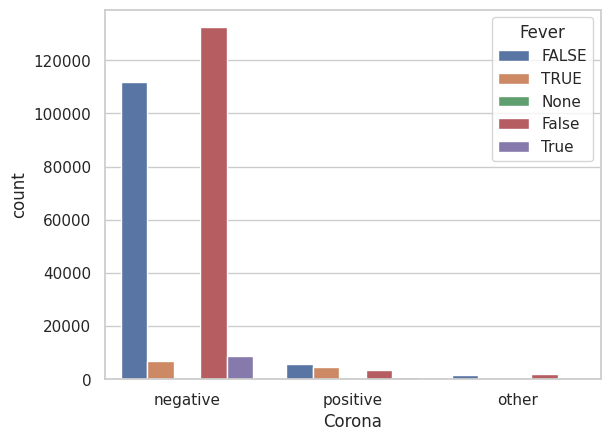

In [ ]:
sns.countplot(data, x = data['Corona'],hue='Fever')
sns.set(style='whitegrid')

The number of covid negative people who got fever is lesser than the number of covid negative people who did not get fever. And the people who got fever or not are postively reported for Covid-19 is almost equal in number. So that, **fever is not considerable symptom actually in case of covid**.

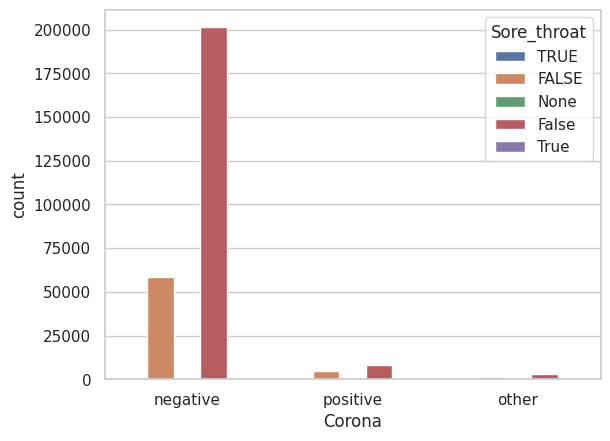

In [ ]:
sns.countplot(data, x = data['Corona'],hue='Sore_throat')
sns.set(style='whitegrid')

The number of covid positive people who got sore_troat is very less as compared to the covid positive people who did not get sore_troat and the number of covid negative people who did not sore_troat. So that, **sore_troat is also not considerable symptom for Covid-19**.

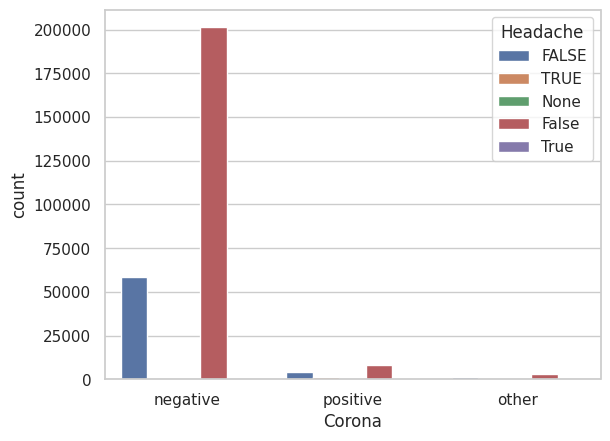

In [ ]:
sns.countplot(data, x = data['Corona'],hue='Headache')
sns.set(style='whitegrid')

The reporting of symptom headache is similar to sore_throat. i.e.; **headache is also not considerable symptom for covid-19**

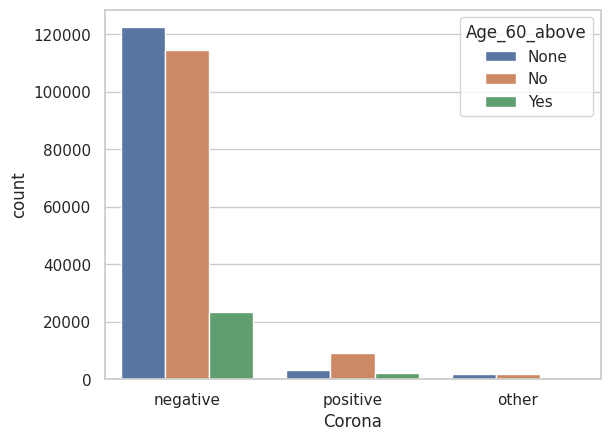

In [ ]:
sns.countplot(data, x = data['Corona'],hue='Age_60_above')
sns.set(style='whitegrid')

The reporting of Age_60_above is similar to sore_throat i.e.; **Age_60_above is also not considerable symptom for covid-19**

---



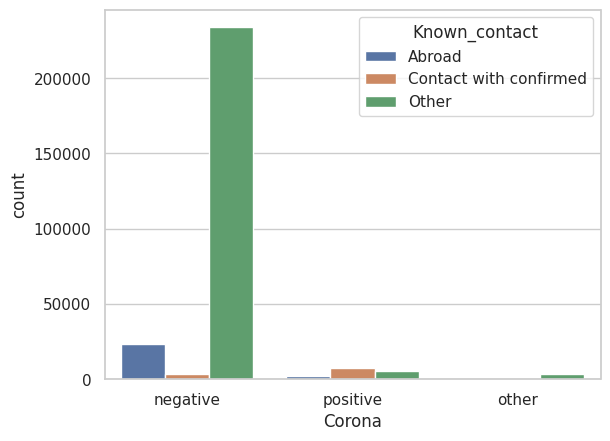

In [ ]:
sns.countplot(data, x = data['Corona'],hue='Known_contact')
sns.set(style='whitegrid')

The one known_contact who got confirmed for positively reported people is higher than other, so that feature **known_contract with confirmed persons is considerable**

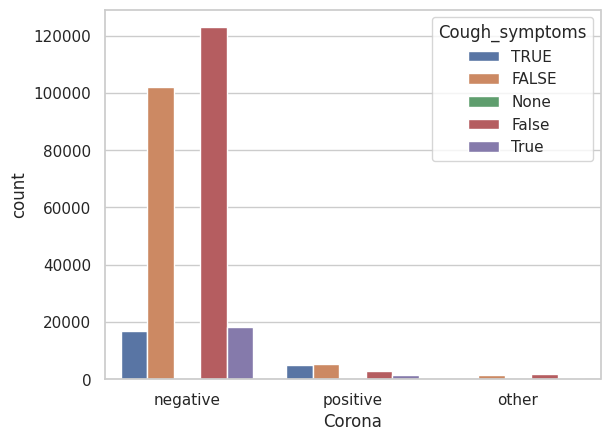

In [ ]:
sns.countplot(data, x = data['Corona'],hue='Cough_symptoms')
sns.set(style='whitegrid')

the number of covid positive people who has cough or not is almost equal.On the other hand, the number of covid negative people who got cough is higher than the number of covid positive people. Therefore, **Cough_symptoms is not a considerable symptom for covid-19**.